In [22]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/aran/Desktop/Semester 1/Introduction to machine learning/assignments/hypothesis assignment/collegeData.csv')

In [23]:
df.head()

,SexCode,MaritalCode,PrevEdCode,DDVeteran,DaysEnrollToStart,AgeAtStart,AgeAtGrad,GPA,MinutesAttended,HoursAttempt,HoursEarned,HoursReq,MinutesAbsent,TransferCredits,TransferGPA,MinEFC,MaxENTEntranceScore,gradFlag
0,M,M,BACH,0,55,24,27,3.22,145953,2925.0,2550.0,2565,3475,19.00,2.55,0.0,81.0,1
1,F,M,BACH,0,143,22,25,3.02,129045,2640.0,2565.0,2565,11840,12.00,NaN,0.0,89.5,1
2,F,S,BACH,0,98,30,33,3.47,111385,2559.0,2514.0,2565,935,37.67,2.84,0.0,NaN,1
3,F,UN,BACH,0,101,24,27,3.19,135401,2520.0,2520.0,2565,4549,6.00,NaN,0.0,87.5,1
4,M,NaN,SOMECOLL,0,61,19,22,3.84,115660,2520.0,2520.0,2565,1340,22.00,NaN,3141.0,NaN,1


In [24]:
df.shape

(2784, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SexCode              2784 non-null   object 
 1   MaritalCode          1796 non-null   object 
 2   PrevEdCode           2784 non-null   object 
 3   DDVeteran            2784 non-null   int64  
 4   DaysEnrollToStart    2784 non-null   int64  
 5   AgeAtStart           2784 non-null   int64  
 6   AgeAtGrad            2784 non-null   int64  
 7   GPA                  2784 non-null   float64
 8   MinutesAttended      2784 non-null   int64  
 9   HoursAttempt         2784 non-null   float64
 10  HoursEarned          2784 non-null   float64
 11  HoursReq             2784 non-null   int64  
 12  MinutesAbsent        2784 non-null   int64  
 13  TransferCredits      2066 non-null   float64
 14  TransferGPA          1500 non-null   float64
 15  MinEFC               2743 non-null   f

In [26]:
df.describe()

,DDVeteran,DaysEnrollToStart,AgeAtStart,AgeAtGrad,GPA,MinutesAttended,HoursAttempt,HoursEarned,HoursReq,MinutesAbsent,TransferCredits,TransferGPA,MinEFC,MaxENTEntranceScore,gradFlag
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2066.000000,1500.000000,2743.000000,1796.000000,2784.000000
mean,0.005747,71.128233,25.524066,28.250000,3.034393,96495.877514,2054.251437,1957.226832,2407.877155,3089.164871,25.036839,2.841807,3521.382428,89.274298,0.660920
std,0.075605,44.435378,6.036194,5.999701,0.772195,43139.663919,806.105022,842.358187,525.066156,2897.780843,12.286023,0.464902,23005.982035,216.746680,0.473482
min,0.000000,0.000000,16.000000,19.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.350000,0.000000,58.500000,0.000000
25%,0.000000,37.000000,21.000000,24.000000,2.850000,69204.750000,1500.000000,1290.000000,2565.000000,950.000000,15.000000,2.560000,0.000000,80.500000,0.000000
50%,0.000000,69.000000,24.000000,27.000000,3.240000,111185.000000,2520.000000,2520.000000,2565.000000,2275.000000,25.370000,2.860000,0.000000,83.500000,1.000000
75%,0.000000,101.000000,28.000000,31.000000,3.490000,127274.000000,2562.000000,2523.000000,2565.000000,4306.250000,35.000000,3.140000,1149.000000,86.500000,1.000000
max,1.000000,580.000000,57.000000,60.000000,4.000000,181870.000000,3390.000000,2850.000000,2565.000000,21621.000000,64.000000,4.000000,999999.000000,9124.000000,1.000000


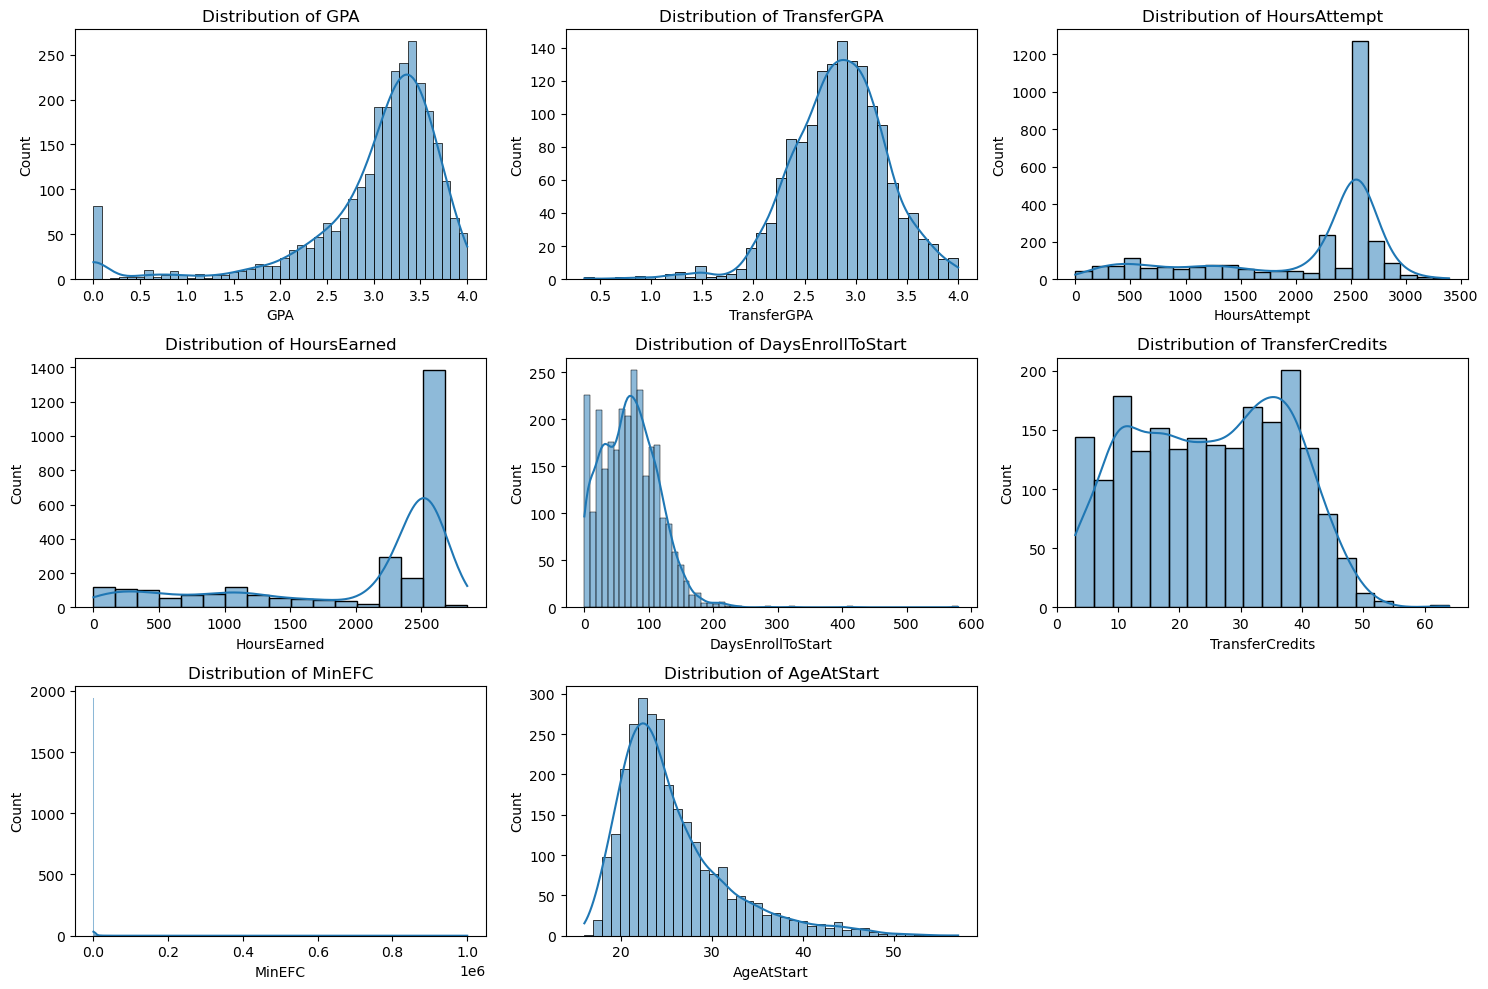

In [27]:
numeric_columns = ['GPA', 'TransferGPA', 'HoursAttempt', 'HoursEarned', 'DaysEnrollToStart', 'TransferCredits', 'MinEFC', 'AgeAtStart']
fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    ax = fig.add_subplot(3, 3, i)
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [28]:
def hypothesis_test(df, column, condition, hypothesized_mean, alternative, alpha=0.5):
    filtered_data = df[condition]
    sample_Mean = filtered_data[column].mean()
    sample_std = filtered_data[column].std()
    n = filtered_data[column].count()

    t_static, p_value = stats.ttest_1samp(filtered_data[column].dropna(), hypothesized_mean)

    reject = p_value < alpha
    result = "Reject the null hypothesis" if reject else "Fail to reject the null hypothesis"

    print(f"Testing {column} with hypothesized mean {hypothesized_mean}:")
    print(f"Sample mean: {sample_Mean}, Sample size: {n}, T-statistic: {t_static}, P-value: {p_value}")
    print(f"Conclusion: {result}\n")


In [29]:
missing_values = df.isnull().sum()
missing_values[missing_values>0]

MaritalCode             988
TransferCredits         718
TransferGPA            1284
MinEFC                   41
MaxENTEntranceScore     988
dtype: int64

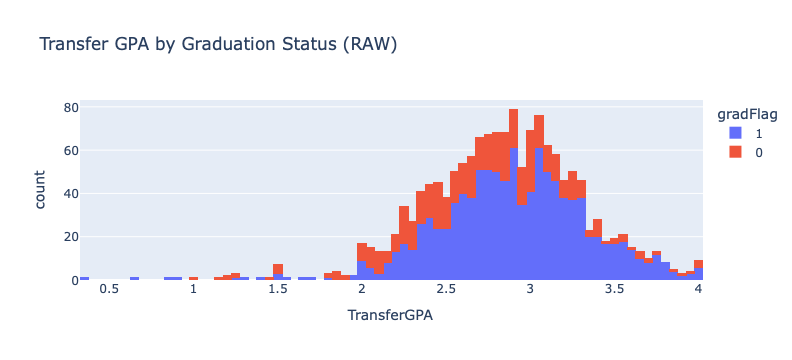

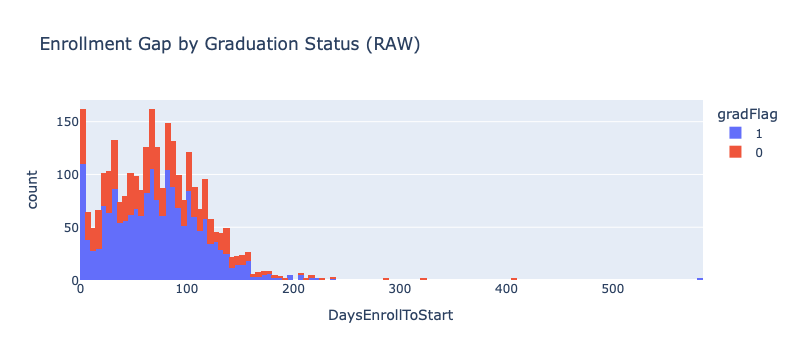

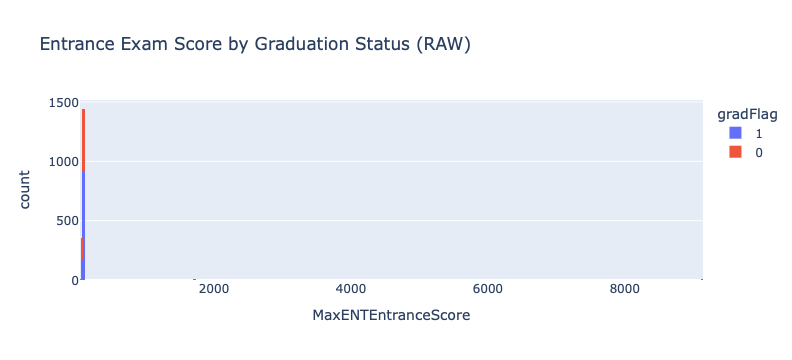

In [30]:
fig1 = px.histogram(df, x='TransferGPA', color='gradFlag', title="Transfer GPA by Graduation Status (RAW)")
fig1.show()

fig2 = px.histogram(df, x='DaysEnrollToStart', color='gradFlag', title="Enrollment Gap by Graduation Status (RAW)")
fig2.show()

fig3 = px.histogram(df, x='MaxENTEntranceScore', color='gradFlag', title="Entrance Exam Score by Graduation Status (RAW)")
fig3.show()


### DATA CLEANING

In [31]:
df = df.assign(
    MaritalCode=df['MaritalCode'].fillna('Unknown'),                # Fill with placeholder for categorical
    TransferCredits=df['TransferCredits'].fillna(0),                # Fill missing transfer credits with 0
    TransferGPA=df['TransferGPA'].fillna(df['TransferGPA'].median()),  # Fill GPA with median
    MinEFC=df['MinEFC'].fillna(df['MinEFC'].median()),              # Fill EFC with median
    MaxENTEntranceScore=df['MaxENTEntranceScore'].fillna(df['MaxENTEntranceScore'].median())  # Fill entrance score with median
)

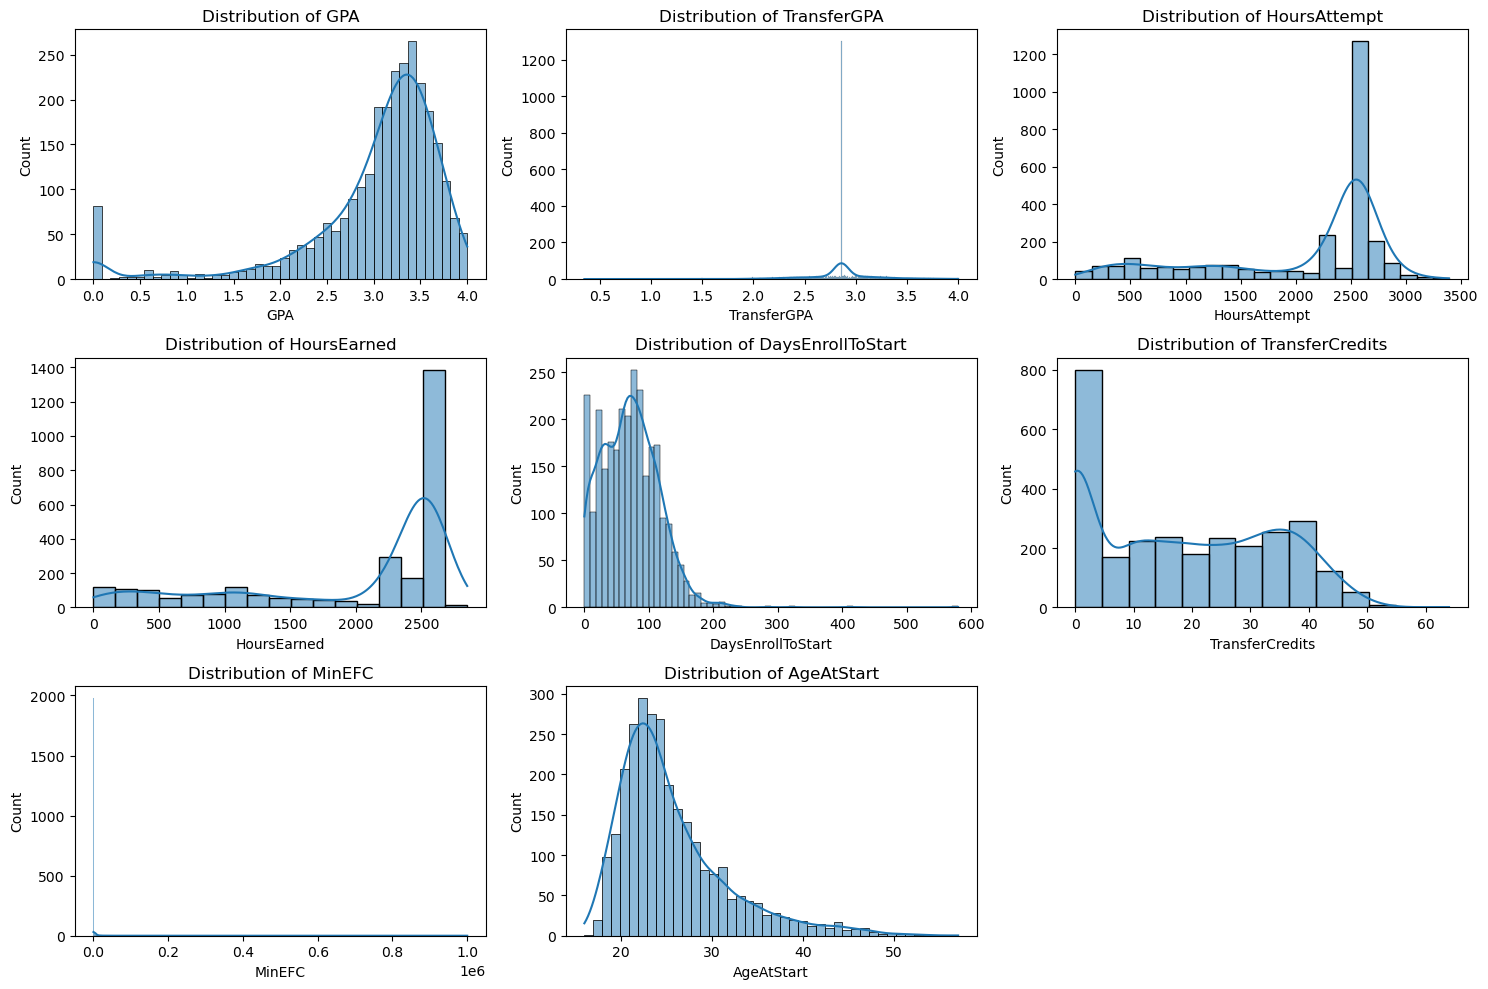

In [57]:
numeric_columns = ['GPA', 'TransferGPA', 'HoursAttempt', 'HoursEarned', 'DaysEnrollToStart', 'TransferCredits', 'MinEFC', 'AgeAtStart']
fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    ax = fig.add_subplot(3, 3, i)
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

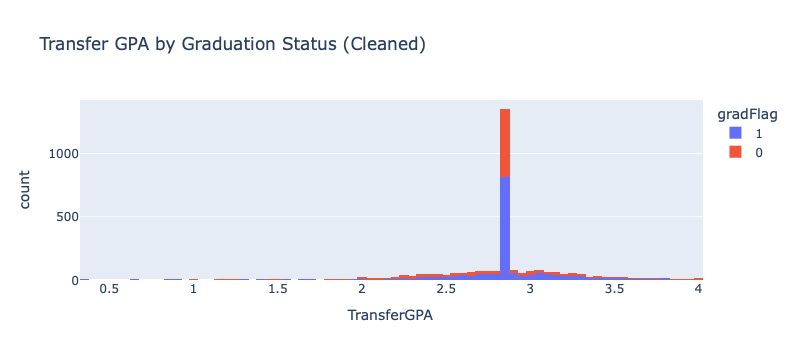

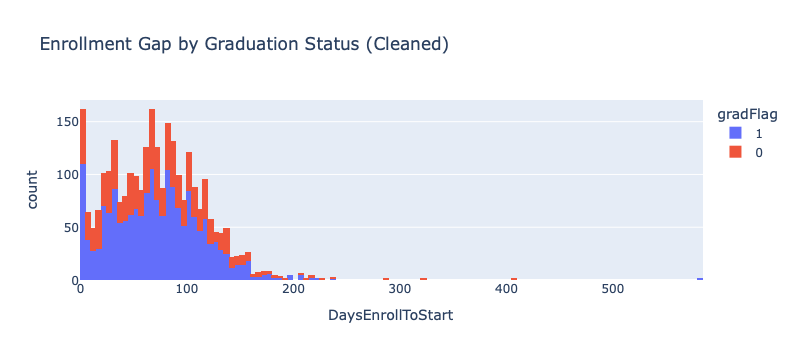

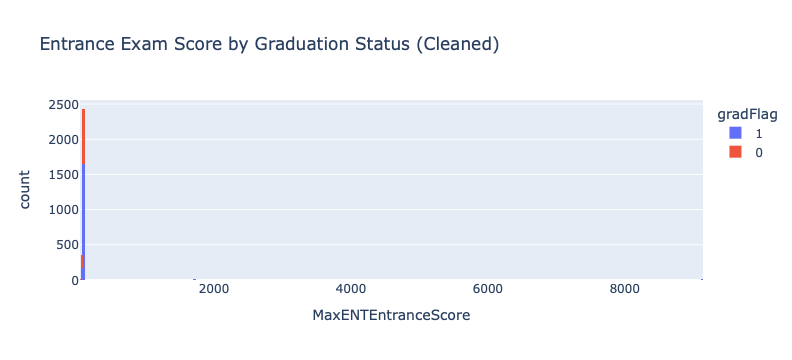

In [32]:
# EDA: Visualizing relevant columns after cleaning
fig1 = px.histogram(df, x='TransferGPA', color='gradFlag', title="Transfer GPA by Graduation Status (Cleaned)")
fig1.show()

fig2 = px.histogram(df, x='DaysEnrollToStart', color='gradFlag', title="Enrollment Gap by Graduation Status (Cleaned)")
fig2.show()

fig3 = px.histogram(df, x='MaxENTEntranceScore', color='gradFlag', title="Entrance Exam Score by Graduation Status (Cleaned)")
fig3.show()


**Research Question 1:**
Do students who drop out tend to have lower transferred GPA compared to those who graduate

**Hypotheses:**
* **a) For students who do not graduate:**
    * **Null Hypothesis (H₀):** mean transfer GPA ≥ 2.75
    * **Alternative Hypothesis (Hₐ):** mean transfer GPA < 2.75
* **b) For students who graduate:**
    * **Null Hypothesis (H₀):** mean transfer GPA ≤ 2.8
    * **Alternative Hypothesis (Hₐ):** mean transfer GPA > 2.8

In [34]:
# Research Question 1: Transfer GPA for Graduates vs Non-Graduates
hypothesis_test(df, 'TransferGPA', df['gradFlag'] == 0, 2.75, 'less')
hypothesis_test(df, 'TransferGPA', df['gradFlag'] == 1, 2.8, 'greater')

Testing TransferGPA with hypothesized mean 2.75:
Sample mean: 2.786345338983051, Sample size: 944, T-statistic: 3.35899552483367, P-value: 0.0008136007317137706
Conclusion: Reject the null hypothesis

Testing TransferGPA with hypothesized mean 2.8:
Sample mean: 2.88295652173913, Sample size: 1840, T-statistic: 10.427334543410211, P-value: 8.987364327590536e-25
Conclusion: Reject the null hypothesis



#### RESULT 
Statement (a) is incorrect based on our output. Our data suggests that non-graduating students have a GPA above 2.75, not below.

Statement (b) is correct and aligns with our output: graduating students have a GPA significantly above 2.8.


**Research Question 2:**
Do students who drop out tend to have a shorter time gap between enrollment and the start of the semester compared to those who graduate?

**Hypotheses:**

* **a) For students who do not graduate:**
    * **Null Hypothesis (H₀):** mean days between enrollment and semester start ≥ 71
    * **Alternative Hypothesis (Hₐ):** mean days between enrollment and semester start < 71
* **b) For students who graduate:**
    * **Null Hypothesis (H₀):** mean days between enrollment and semester start ≤ 71
    * **Alternative Hypothesis (Hₐ):** mean days between enrollment and semester start > 71

In [37]:
# Research Question 2: Days from Enrollment to Start for Graduates vs Non-Graduates
hypothesis_test(df, 'DaysEnrollToStart', df['gradFlag'] == 0, 71, 'less')
hypothesis_test(df, 'DaysEnrollToStart', df['gradFlag'] == 1, 71, 'greater')


Testing DaysEnrollToStart with hypothesized mean 71:
Sample mean: 70.99046610169492, Sample size: 944, T-statistic: -0.006328839851492547, P-value: 0.9949516886822141
Conclusion: Fail to reject the null hypothesis

Testing DaysEnrollToStart with hypothesized mean 71:
Sample mean: 71.19891304347826, Sample size: 1840, T-statistic: 0.19628723532239142, P-value: 0.8444070394239892
Conclusion: Fail to reject the null hypothesis



#### RESULT

Statement (a) is incorrect based on our output. Our data suggests that non-graduating students have a mean time gap between enrollment and the start of the semester close to 71 days, which is not significantly shorter.

Statement (b) is incorrect based on our output. Graduating students also have a mean time gap close to 71 days, which is not significantly longer. Therefore, there is no significant difference between the two groups regarding the time gap between enrollment and semester start.

**Research Question 3:**
Do students who drop out tend to have lower entrance exam score compared to those who graduate?

**Hypotheses:**

* **a) For students who do not graduate:**
    * **Null Hypothesis (H₀):** mean entrance exam score ≥ 83
    * **Alternative Hypothesis (Hₐ):** mean entrance exam score < 83
* **b) For students who graduate:**
    * **Null Hypothesis (H₀):** mean entrance exam score ≤ 90
    * **Alternative Hypothesis (Hₐ):** mean entrance exam score > 90

In [40]:
# Research Question 3: Entrance Exam Score for Graduates vs Non-Graduates
hypothesis_test(df, 'MaxENTEntranceScore', df['gradFlag'] == 0, 83, 'less')
hypothesis_test(df, 'MaxENTEntranceScore', df['gradFlag'] == 1, 90, 'greater')

Testing MaxENTEntranceScore with hypothesized mean 83:
Sample mean: 82.7408156779661, Sample size: 944, T-statistic: -1.928899288299541, P-value: 0.054043210817717846
Conclusion: Reject the null hypothesis

Testing MaxENTEntranceScore with hypothesized mean 90:
Sample mean: 89.52571195652173, Sample size: 1840, T-statistic: -0.09502062969036917, P-value: 0.924308793060779
Conclusion: Fail to reject the null hypothesis



#### RESULT

Statement (a) is correct based on our output. Our data suggests that non-graduating students have an entrance exam score slightly below 83, which leads us to reject the null hypothesis.

Statement (b) is incorrect based on our output. Graduating students have an entrance exam score slightly below 90, so we fail to reject the null hypothesis, indicating that there is no significant evidence to suggest they score higher than 90.